In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

PLOT ERRORS

In [2]:
saturation = 0.7
linewidth = 1
width = 0.7
dpi = 100
fontsize = 18
sns.set_style('darkgrid')
with open(f'sol/analytics.pkl', 'rb') as f:
    err_map_mean_pm, err_map_theta_pm, err_pm_mean_pm, err_pm_theta_pm, err_map_mean_fb, err_map_theta_fb, err_pm_mean_fb, err_pm_theta_fb, err_map_mean_em, err_map_theta_em, err_pm_mean_em, err_pm_theta_em, cpu_time_pm, cpu_time_fb, cpu_time_em, ess_pm, ess_fb, ess_em = pickle.load(
        f)

PLOT DATA

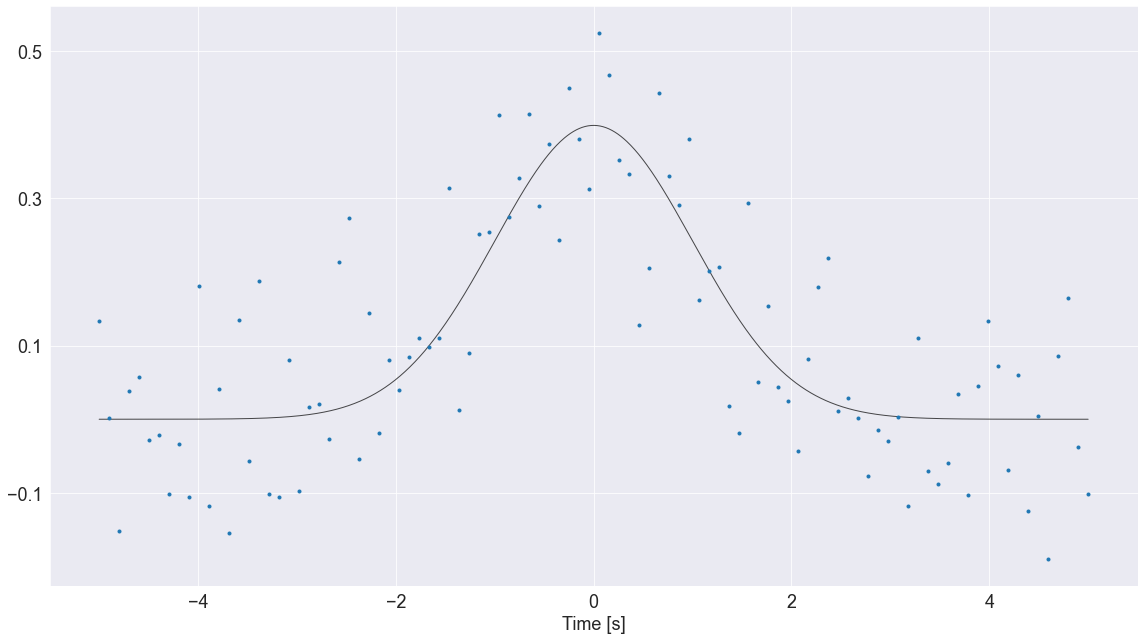

In [3]:
with open(f'data/data_99.pkl', 'rb') as f:
    sourcespace, data, true_noise = pickle.load(f)

plt.figure(figsize=(16, 9))
plt.plot(np.linspace(-5, 5, 1000), stats.norm.pdf(np.linspace(-5, 5, 1000), 0, 1), 'k', linewidth=linewidth,
         alpha=saturation)
plt.plot(sourcespace, data, '.', linewidth=linewidth)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel(None)
plt.xlabel('Time [s]', size=fontsize)
plt.xticks([-4, -2, 0, 2, 4], size=fontsize)
plt.yticks([-0.1, 0.1, 0.3, 0.5], size=fontsize)
plt.tight_layout()
plt.savefig('fig/data_toy.jpg', dpi=dpi)
plt.show()

PLOT ERROR THETA AND MEAN

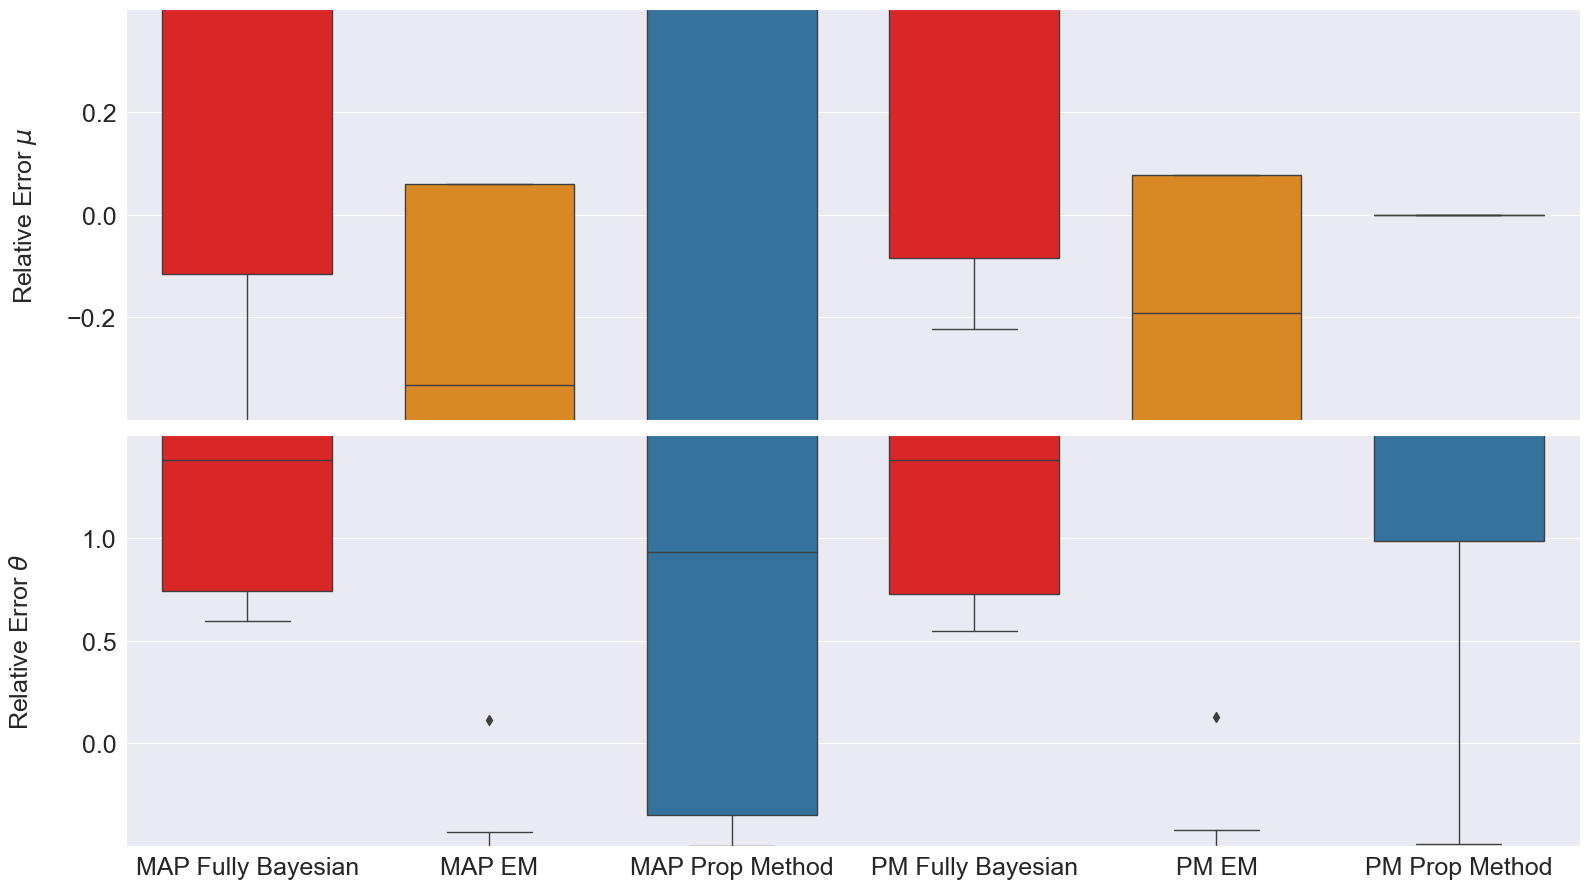

In [4]:
fin_it = 1
fig, ax = plt.subplots(2, 1, figsize=(16, 9), dpi=100)
data = [np.sort(err_map_mean_fb)[fin_it:], np.sort(err_map_mean_em)[fin_it:], np.sort(err_map_mean_pm)[fin_it:],
        np.sort(err_pm_mean_fb)[fin_it:], np.sort(err_pm_mean_em)[fin_it:], np.sort(err_pm_mean_pm)[fin_it:]]
sns.boxplot(data=data, palette=['red', 'darkorange', '#1f77b4', 'red', 'darkorange', '#1f77b4'],
            saturation=saturation, width=width, linewidth=linewidth, ax=ax[0])
plt.sca(ax[0])
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.yticks([-0.2, 0, 0.2], size=fontsize)
plt.ylim([-0.4, 0.4])
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])
plt.ylabel(r'Relative Error $\mu$', fontsize=fontsize, rotation=90, labelpad=20)

sns.boxplot(
    data=[err_map_theta_fb, err_map_theta_em, err_map_theta_pm, err_pm_theta_fb, err_pm_theta_em, err_pm_theta_pm],
    palette=['red', 'darkorange', '#1f77b4', 'red', 'darkorange', '#1f77b4'], saturation=saturation,
    width=width, linewidth=linewidth, ax=ax[1])
plt.sca(ax[1])
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim([-0.5, 1.5])
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([0, 1, 2, 3, 4, 5], ['MAP Fully Bayesian', 'MAP EM', 'MAP Prop Method',
                                'PM Fully Bayesian', 'PM EM', 'PM Prop Method'], size=fontsize)
plt.yticks([0, 0.5, 1], size=fontsize)
plt.ylabel(r'Relative Error $\theta$', fontsize=fontsize, rotation=90, labelpad=35)
plt.tight_layout()
plt.savefig('fig/sol_proposed_vs_fully_bayesian_toy.png', dpi=dpi)
plt.show()

PLOT CPU TIME

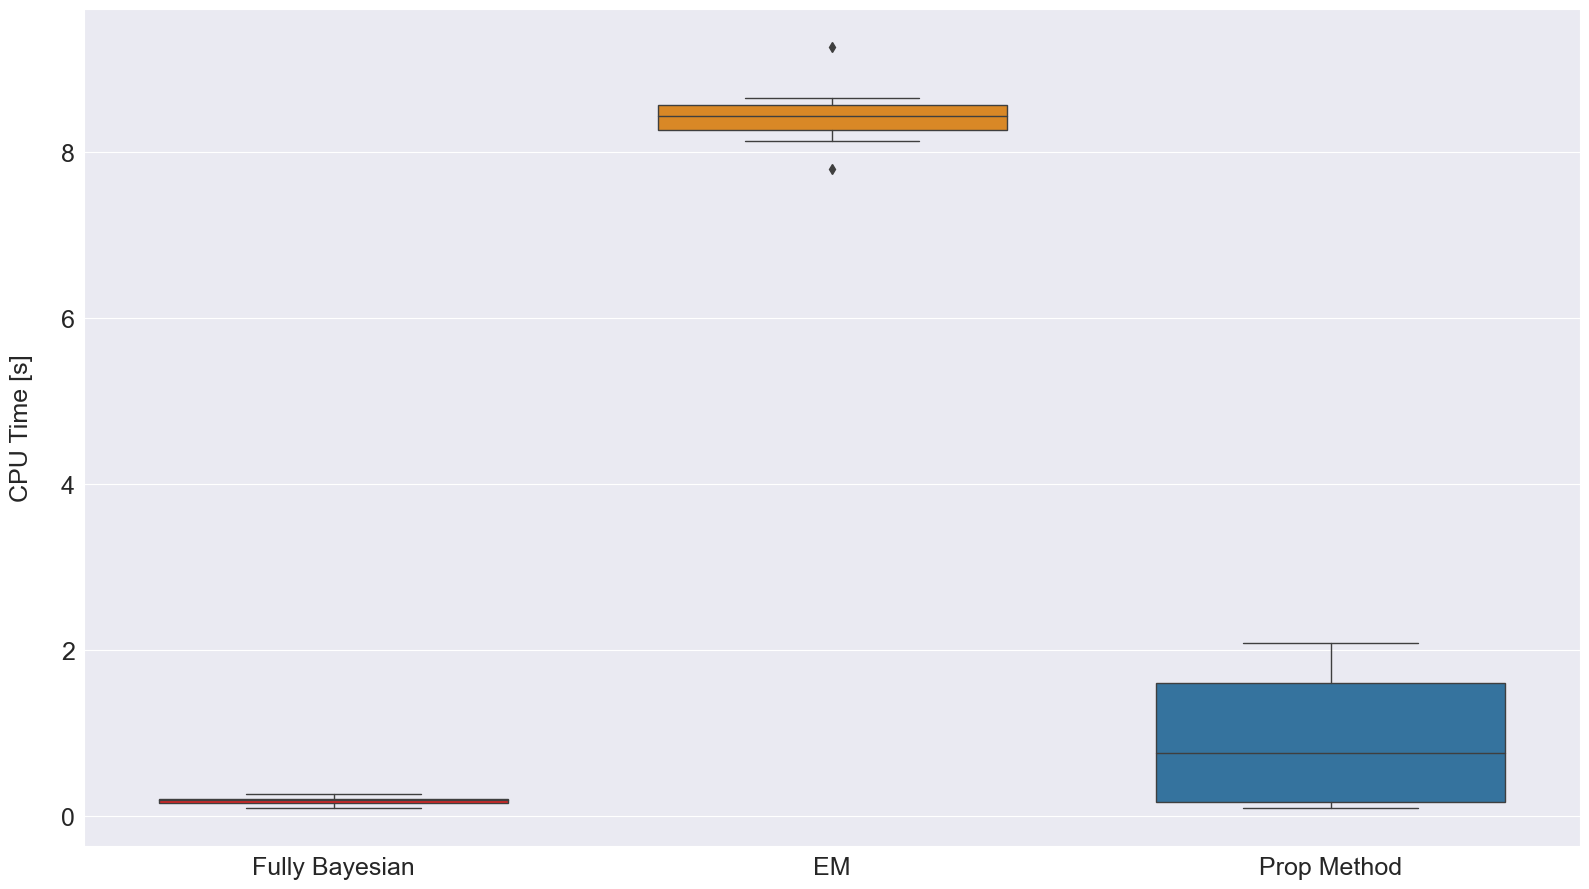

In [5]:
plt.figure(figsize=(16, 9), dpi=100)
sns.boxplot(data=[cpu_time_fb, cpu_time_em, cpu_time_pm], palette=['red', 'darkorange', '#1f77b4'],
            saturation=saturation, width=width,
            linewidth=linewidth)
plt.xticks([0, 1, 2], ['Fully Bayesian', 'EM', 'Prop Method'], size=fontsize)
plt.yticks(size=fontsize)
plt.ylabel('CPU Time [s]', fontsize=fontsize, rotation=90, labelpad=20)
plt.tight_layout()
plt.savefig('fig/cpu_time_toy.png', dpi=dpi)
plt.show()

PLOT ESS

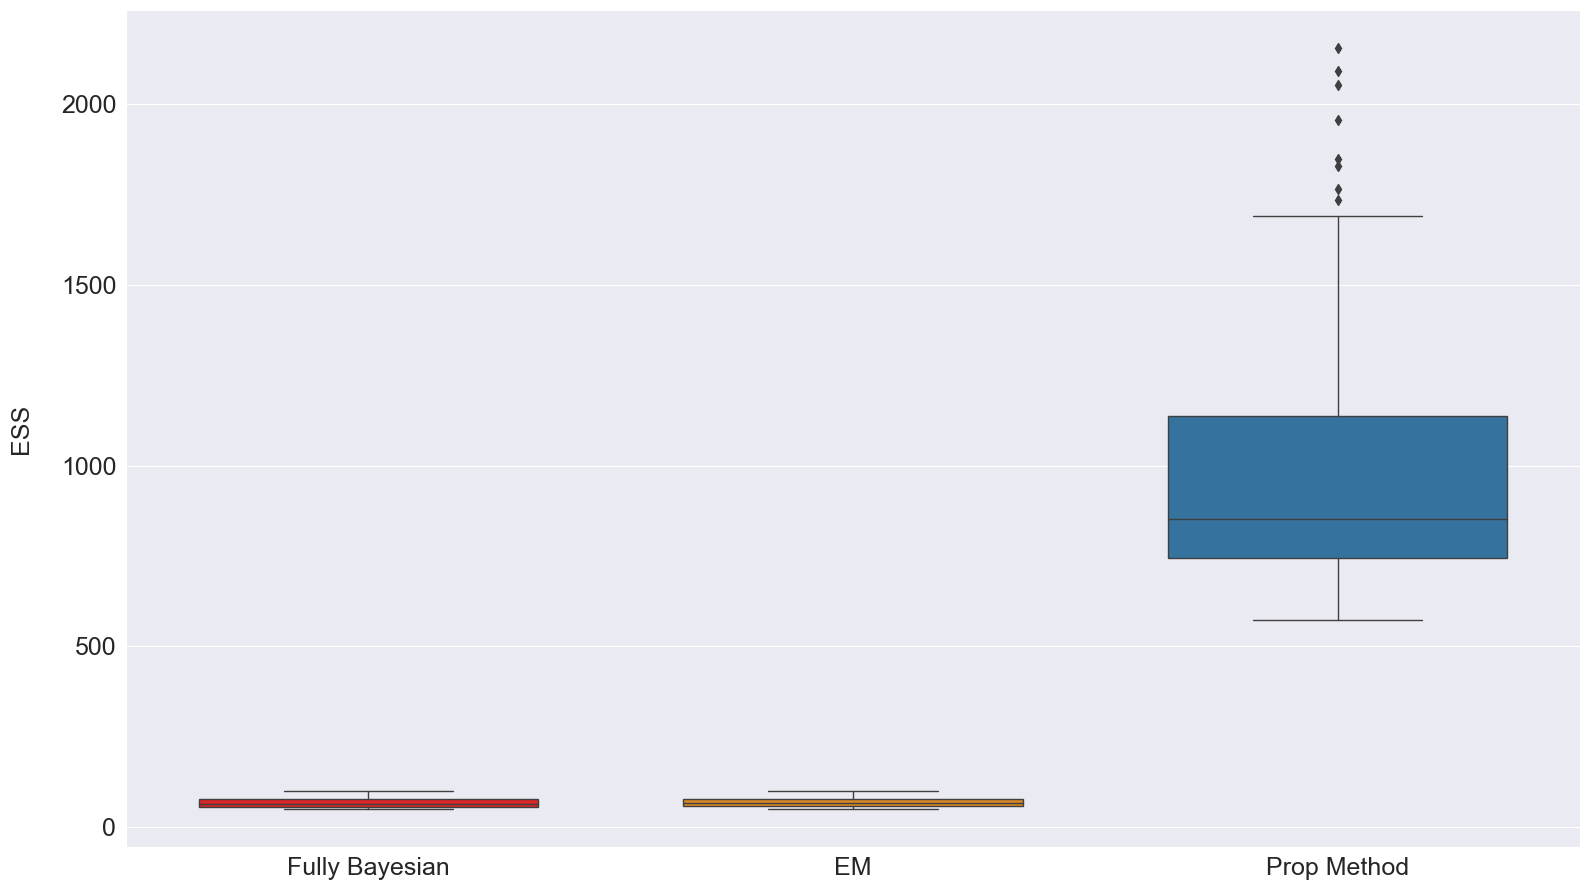

In [22]:
plt.figure(figsize=(16, 9), dpi=100)
sns.boxplot(data=[ess_fb, ess_em, ess_pm], palette=['red', 'darkorange', '#1f77b4'], saturation=saturation, width=width,
            linewidth=linewidth)
plt.ylabel('ESS', fontsize=fontsize, rotation=90, labelpad=20)
plt.yticks(size=fontsize)
plt.xticks([0, 1, 2], ['Fully Bayesian', 'EM', 'Prop Method'], size=fontsize)
plt.tight_layout()
plt.savefig('fig/ess_toy.png', dpi=dpi)
plt.show()